# Import Library

In [ ]:
import os, shutil, zipfile
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from google.colab import files
from keras_preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds
import random
from shutil import copyfile

import tensorflow_hub as hub
from tqdm import tqdm


## Create Directory, Download, & Extract Dataset

In [ ]:

BASE_DIR = '/content'
os.chdir(BASE_DIR)


In [ ]:
# Download the datasets
dataset_zip_path = os.path.join(BASE_DIR, 'Bangkit-Capstone-Dataset-main.zip')
if not os.path.exists(dataset_zip_path):
  !wget --no-check-certificate --content-disposition https://codeload.github.com/mrsambaga/Bangkit-Capstone-Dataset/zip/refs/heads/main
else:
  print("Dataset already downloaded")

--2022-05-16 11:41:46--  https://codeload.github.com/mrsambaga/Bangkit-Capstone-Dataset/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 52.193.111.178
Connecting to codeload.github.com (codeload.github.com)|52.193.111.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘Bangkit-Capstone-Dataset-main.zip’

Bangkit-Capstone-Da     [        <=>         ]  66.80M  14.3MB/s    in 5.5s    

2022-05-16 11:41:52 (12.2 MB/s) - ‘Bangkit-Capstone-Dataset-main.zip’ saved [70048247]



In [ ]:
dataset_main_dir = os.path.join(BASE_DIR, 'dataset')
if os.path.exists(dataset_main_dir):
  shutil.rmtree(dataset_main_dir)

os.makedirs(dataset_main_dir)

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
  zip_ref.extractall(dataset_main_dir)

In [ ]:
branch = 'Bangkit-Capstone-Dataset-main/dataset/'
dataset_dir = os.path.join(dataset_main_dir, branch)

for dir in os.listdir(dataset_dir):
  class_dir = os.path.join(dataset_dir, dir)
  print('total images for', dir, 'is', len(os.listdir(class_dir)))

total images for prambanan is 184
total images for tugujogja is 100
total images for lawangsewu is 110
total images for borobudur is 121
total images for majt is 101
total images for monjali is 78


In [ ]:
borobudur_dir = os.path.join(dataset_dir, 'borobudur')
lawangsewu_dir = os.path.join(dataset_dir, 'lawangsewu')
majt_dir = os.path.join(dataset_dir, 'majt')
monjali_dir = os.path.join(dataset_dir, 'monjali')
prambanan_dir = os.path.join(dataset_dir, 'prambanan')
tugujogja_dir = os.path.join(dataset_dir, 'tugujogja')

borobudur_files = os.listdir(borobudur_dir)
print(borobudur_files[:5])

lawangsewu_files = os.listdir(lawangsewu_dir)
print(lawangsewu_files[:5])

majt_files = os.listdir(majt_dir)
print(majt_files[:5])

monjali_files = os.listdir(monjali_dir)
print(monjali_files[:5])

prambanan_files = os.listdir(prambanan_dir)
print(prambanan_files[:5])

tugujogja_files = os.listdir(tugujogja_dir)
print(tugujogja_files[:5])


['borobudur_030.jpg', 'borobudur_101.jpg', 'borobudur_012.jpg', 'borobudur_112.jpg', 'borobudur_005.jpg']
['lawangsewu_097.jpg', 'lawangsewu_069.jpg', 'lawangsewu_050.jpg', 'lawangsewu_089.jpg', 'lawangsewu_02.jpg']
['majt_098.jpg', 'majt_080.jpg', 'majt_037.jpg', 'majt_034.jpg', 'majt_036.jpg']
['monjali_009.jpg', 'monjali_034.jpg', 'monjali_015.jpg', 'monjali_062.jpg', 'monjali_057.jpg']
['prambanan_032.jpg', 'prambanan_168.jpg', 'prambanan_110.jpg', 'prambanan_152.jpg', 'prambanan_181.jpg']
['tugujogja_013.jpg', 'tugujogja_024.jpg', 'tugujogja_040.jpg', 'tugujogja_090.jpg', 'tugujogja_092.jpg']


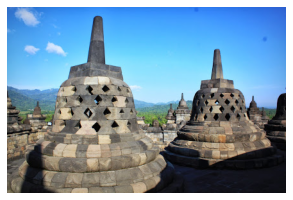

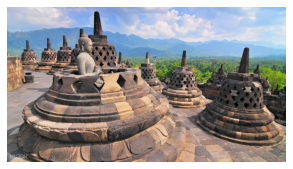

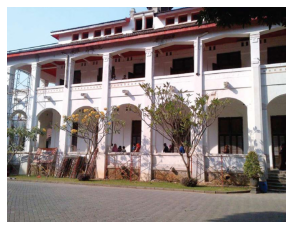

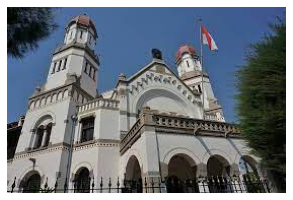

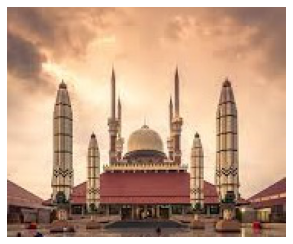

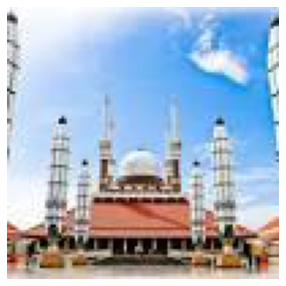

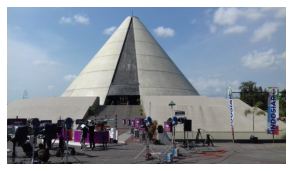

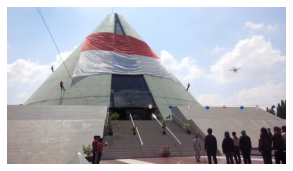

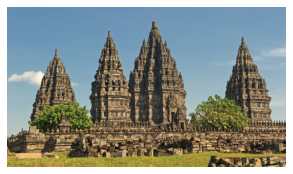

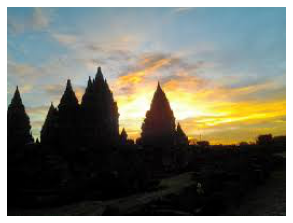

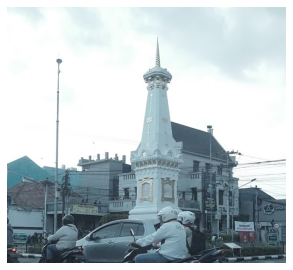

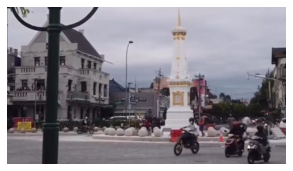

In [ ]:
%matplotlib inline

pic_index = 2

next_borobudur = [os.path.join(borobudur_dir, fname) 
                for fname in borobudur_files[pic_index-2:pic_index]]
next_lawangsewu = [os.path.join(lawangsewu_dir, fname) 
                for fname in lawangsewu_files[pic_index-2:pic_index]]
next_majt = [os.path.join(majt_dir, fname) 
                for fname in majt_files[pic_index-2:pic_index]]
next_monjali = [os.path.join(monjali_dir, fname) 
                for fname in monjali_files[pic_index-2:pic_index]]
next_prambanan = [os.path.join(prambanan_dir, fname) 
                for fname in prambanan_files[pic_index-2:pic_index]]
next_tugujogja = [os.path.join(tugujogja_dir, fname) 
                for fname in tugujogja_files[pic_index-2:pic_index]]



for i, img_path in enumerate(next_borobudur+next_lawangsewu+next_majt+next_monjali+next_prambanan+next_tugujogja):
  plt.figure(figsize=(5, 5))
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# Dataset Preprocessing using tf keras utils

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 694 files belonging to 6 classes.
Using 556 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 694 files belonging to 6 classes.
Using 138 files for validation.


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#Dataset Preprocessing Using TF ImageDataGenerator

In [ ]:
landmark_dir = os.path.join(dataset_dir, 'landmark')

if os.path.exists(landmark_dir):
  shutil.rmtree(landmark_dir)

def create_train_test_dirs(root_path):

  os.makedirs(os.path.join(root_path, 'training'))
  os.makedirs(os.path.join(root_path, 'testing'))

  train_dir = os.path.join(root_path, "training")
  validation_dir = os.path.join(root_path, "testing")

  os.makedirs(os.path.join(train_dir, 'borobudur'))
  os.makedirs(os.path.join(train_dir, 'lawangsewu'))
  os.makedirs(os.path.join(train_dir, 'majt'))
  os.makedirs(os.path.join(train_dir, 'monjali'))
  os.makedirs(os.path.join(train_dir, 'prambanan'))
  os.makedirs(os.path.join(train_dir, 'tugujogja'))

  borobudur_train_dir = os.path.join(train_dir, "borobudur")
  lawangsewu_train_dir = os.path.join(train_dir, "lawangsewu")
  majt_train_dir = os.path.join(train_dir, "majt")
  monjali_train_dir = os.path.join(train_dir, "monjali")
  prambanan_train_dir = os.path.join(train_dir, "prambanan")
  tugujogja_train_dir = os.path.join(train_dir, "tugujogja")

  os.makedirs(os.path.join(validation_dir, 'borobudur'))
  os.makedirs(os.path.join(validation_dir, 'lawangsewu'))
  os.makedirs(os.path.join(validation_dir, 'majt'))
  os.makedirs(os.path.join(validation_dir, 'monjali'))
  os.makedirs(os.path.join(validation_dir, 'prambanan'))
  os.makedirs(os.path.join(validation_dir, 'tugujogja'))

  borobudur_train_dir = os.path.join(validation_dir, "borobudur")
  lawangsewu_train_dir = os.path.join(validation_dir, "lawangsewu")
  majt_train_dir = os.path.join(validation_dir, "majt")
  monjali_train_dir = os.path.join(validation_dir, "monjali")
  prambanan_train_dir = os.path.join(validation_dir, "prambanan")
  tugujogja_train_dir = os.path.join(validation_dir, "tugujogja")
  
try:
  create_train_test_dirs(root_path=landmark_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(landmark_dir):
    for subdir in dirs:
        print(os.path.join(landmark_dir, subdir))

/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/testing
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/training
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/prambanan
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/tugujogja
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/lawangsewu
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/borobudur
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/majt
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/monjali
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/prambanan
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/tugujogja
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/lawangsewu
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/borobudur
/content/dataset/Bangkit-Capstone-Dataset-main/dataset/landmark/majt
/content/dataset/Bangkit-Capstone-Dataset-main/data

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  source = os.listdir(SOURCE)
  for file in source:
    if os.path.getsize(SOURCE+file) == 0:
      print("{} is zero length, so ignoring.".format(file))
      source.remove(file)

  random.sample(source, len(source))

  train_size = round(len(source) * SPLIT_SIZE)

  for i in range(train_size):
    copyfile(SOURCE+source[i], TRAINING+source[i]) 
  for i in range(train_size, len(source)):
    copyfile(SOURCE+source[i], TESTING+source[i])

In [ ]:
#Already defined source directory
BOROBUDUR_SOURCE_DIR = os.path.join(dataset_dir, 'borobudur/')
LAWANGSEWU_SOURCE_DIR = os.path.join(dataset_dir, 'lawangsewu/')
MAJT_SOURCE_DIR = os.path.join(dataset_dir, 'majt/')
MONJALI_SOURCE_DIR = os.path.join(dataset_dir, 'monjali/')
PRAMBANAN_SOURCE_DIR = os.path.join(dataset_dir, 'prambanan/')
TUGUJOGJA_SOURCE_DIR = os.path.join(dataset_dir, 'tugujogja/')

TRAINING_DIR = os.path.join(landmark_dir, "training/")
TESTING_DIR = os.path.join(landmark_dir, "testing/")

#Training Directory
TRAINING_BOROBUDUR_DIR = os.path.join(TRAINING_DIR, "borobudur/")
TRAINING_LAWANGSEWU_DIR = os.path.join(TRAINING_DIR, "lawangsewu/")
TRAINING_MAJT_DIR = os.path.join(TRAINING_DIR, "majt/")
TRAINING_MONJALI_DIR = os.path.join(TRAINING_DIR, "monjali/")
TRAINING_PRAMBANAN_DIR = os.path.join(TRAINING_DIR, "prambanan/")
TRAINING_TUGUJOGJA_DIR = os.path.join(TRAINING_DIR, "tugujogja/")

#Testing Directory
TESTING_BOROBUDUR_DIR = os.path.join(TESTING_DIR, "borobudur/")
TESTING_LAWANGSEWU_DIR = os.path.join(TESTING_DIR, "lawangsewu/")
TESTING_MAJT_DIR = os.path.join(TESTING_DIR, "majt/")
TESTING_MONJALI_DIR = os.path.join(TESTING_DIR, "monjali/")
TESTING_PRAMBANAN_DIR = os.path.join(TESTING_DIR, "prambanan/")
TESTING_TUGUJOGJA_DIR = os.path.join(TESTING_DIR, "tugujogja/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_BOROBUDUR_DIR)) > 0:
  for file in os.scandir(TRAINING_BOROBUDUR_DIR):
    os.remove(file.path)
  for file in os.scandir(TRAINING_LAWANGSEWU_DIR):
    os.remove(file.path)
  for file in os.scandir(TRAINING_MAJT_DIR):
    os.remove(file.path)
  for file in os.scandir(TRAINING_MONJALI_DIR):
    os.remove(file.path)
  for file in os.scandir(TRAINING_PRAMBANAN_DIR):
    os.remove(file.path)
  for file in os.scandir(TRAINING_TUGUJOGJA_DIR):
    os.remove(file.path)
  for file in os.scandir(TESTING_BOROBUDUR_DIR):
    os.remove(file.path)
  for file in os.scandir(TESTING_LAWANGSEWU_DIR):
    os.remove(file.path)
  for file in os.scandir(TESTING_MAJT_DIR):
    os.remove(file.path)
  for file in os.scandir(TESTING_MONJALI_DIR):
    os.remove(file.path)
  for file in os.scandir(TESTING_PRAMBANAN_DIR):
    os.remove(file.path)
  for file in os.scandir(TESTING_TUGUJOGJA_DIR):
    os.remove(file.path)


# Define proportion of images used for training
split_size = .80

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(BOROBUDUR_SOURCE_DIR, TRAINING_BOROBUDUR_DIR, TESTING_BOROBUDUR_DIR, split_size)
split_data(LAWANGSEWU_SOURCE_DIR, TRAINING_LAWANGSEWU_DIR, TESTING_LAWANGSEWU_DIR, split_size)
split_data(MONJALI_SOURCE_DIR, TRAINING_MONJALI_DIR, TESTING_MONJALI_DIR, split_size)
split_data(MAJT_SOURCE_DIR, TRAINING_MAJT_DIR, TESTING_MAJT_DIR, split_size)
split_data(PRAMBANAN_SOURCE_DIR, TRAINING_PRAMBANAN_DIR, TESTING_PRAMBANAN_DIR, split_size)
split_data(TUGUJOGJA_SOURCE_DIR, TRAINING_TUGUJOGJA_DIR, TESTING_TUGUJOGJA_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\nThere are {len(os.listdir(TRAINING_BOROBUDUR_DIR))} images of Borobudur for training")
print(f"There are {len(os.listdir(TRAINING_LAWANGSEWU_DIR))} images of Lawang Sewu for training")
print(f"There are {len(os.listdir(TRAINING_MAJT_DIR))} images of MAJT for training")
print(f"There are {len(os.listdir(TRAINING_MONJALI_DIR))} images of Monjali for training")
print(f"There are {len(os.listdir(TRAINING_PRAMBANAN_DIR))} images of Prambanan for training")
print(f"There are {len(os.listdir(TRAINING_TUGUJOGJA_DIR))} images of Tugu Jogja for training")

print(f"\nThere are {len(os.listdir(TESTING_BOROBUDUR_DIR))} images of Borobudur for testing")
print(f"There are {len(os.listdir(TESTING_LAWANGSEWU_DIR))} images of Lawang Sewu for testing")
print(f"There are {len(os.listdir(TESTING_MAJT_DIR))} images of MAJT for testing")
print(f"There are {len(os.listdir(TESTING_MONJALI_DIR))} images of Monjali for testing")
print(f"There are {len(os.listdir(TESTING_PRAMBANAN_DIR))} images of Prambanan for testing")
print(f"There are {len(os.listdir(TESTING_TUGUJOGJA_DIR))} images of Tugu Jogja for testing")


There are 109 images of Borobudur for training
There are 99 images of Lawang Sewu for training
There are 91 images of MAJT for training
There are 70 images of Monjali for training
There are 166 images of Prambanan for training
There are 90 images of Tugu Jogja for training

There are 12 images of Borobudur for testing
There are 11 images of Lawang Sewu for testing
There are 10 images of MAJT for testing
There are 8 images of Monjali for testing
There are 18 images of Prambanan for testing
There are 10 images of Tugu Jogja for testing


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=10,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(96, 96))

  validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(96, 96))
  return train_generator, validation_generator

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

#Transfer Learning Model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-16 06:36:12--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.12.240, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   234MB/s    in 0.4s    

2022-05-16 06:36:13 (234 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  pre_trained_model = InceptionV3(input_shape = (96, 96, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


#Model Pipeline with Transfer Learning

In [ ]:
def output_of_last_layer(pre_trained_model):
  
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 4, 4, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x) 
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)        

  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)

  # Compile the model
  model.compile(optimizer = Adam(learning_rate=0.0001), 
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  
  return model

In [ ]:
# Save your model in a variable
tl_model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = tl_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in tl_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,560,225 total parameters in this model.
There are 12,584,961 trainable parameters in this model.


In [ ]:
history = tl_model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    verbose = 1
                    )

FileNotFoundError: ignored

# TF Image Classification Model

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(96, 96, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
#Compile model

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit Model

In [ ]:
history = model.fit(
  train_generator,
  epochs=100,
  verbose=1,
  validation_data=validation_generator
)

Epoch 1/100
14/18 [======================>.......] - ETA: 1s - loss: 1.7735 - accuracy: 0.2600

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 12s 620ms/step - loss: 1.7746 - accuracy: 0.2523 - val_loss: 1.7318 - val_accuracy: 0.2662
Epoch 2/100
18/18 [==============================] - 11s 597ms/step - loss: 1.7049 - accuracy: 0.2649 - val_loss: 1.6677 - val_accuracy: 0.2662
Epoch 3/100
18/18 [==============================] - 11s 595ms/step - loss: 1.5951 - accuracy: 0.3459 - val_loss: 1.5116 - val_accuracy: 0.4820
Epoch 4/100
18/18 [==============================] - 11s 598ms/step - loss: 1.5378 - accuracy: 0.3910 - val_loss: 1.3601 - val_accuracy: 0.4245
Epoch 5/100
18/18 [==============================] - 11s 624ms/step - loss: 1.3943 - accuracy: 0.4613 - val_loss: 1.2063 - val_accuracy: 0.6043
Epoch 6/100
18/18 [==============================] - 11s 600ms/step - loss: 1.2167 - accuracy: 0.5261 - val_loss: 1.1062 - val_accuracy: 0.5827
Epoch 7/100
18/18 [==============================] - 11s 624ms/step - loss: 1.2364 - accuracy: 0.5207 - val_loss: 1.2185 - val_accuracy: 0.5324
Epoc

## Plot Result

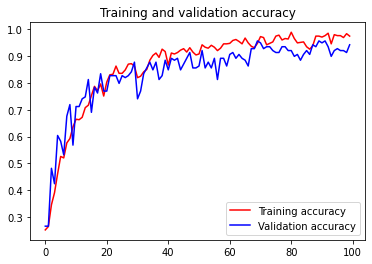

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

#Predicting Image

In [ ]:
classes = train_generator.class_indices 
print(classes)

{'borobudur': 0, 'lawangsewu': 1, 'majt': 2, 'monjali': 3, 'prambanan': 4, 'tugujogja': 5}


In [ ]:
branch = 'Bangkit-Capstone-Dataset-main/test_set'
test_dir = os.path.join(dataset_main_dir, branch)
test_files = os.listdir(test_dir)
print(test_files)

['borobudur_131.jpg', 'majt_108.jpg', 'tugujogja_0181.jpg', 'lawangsewu_110.jpg', 'monjali_088.jpg', 'monjali_082.jpg', 'lawangsewu_108.jpg', 'borobudur_126.jpg', 'prambanan_192.jpg', 'lawangsewu_115.JPG', 'monjali_081.jpg', 'borobudur_124.jpg', 'prambanan_193.jpg', 'majt_106.jpg', 'borobudur_128.jpg', 'tugujogja_0183.jpg', '.ipynb_checkpoints', 'monjali_086.jpg', 'borobudur_130.jpg', 'lawangsewu_113.JPG', 'tugujogja_0184.jpg', 'borobudur_127.jpg', 'prambanan_191.jpg', 'tugujogja_0186.jpg', 'monjali_080.jpg', 'prambanan_185.jpg', 'prambanan_194.jpg', 'tugujogja_0180.jpg', 'borobudur_133.jpg', 'lawangsewu_112.JPG', 'prambanan_186.jpg', 'monjali_083.jpg', 'monjali_085.jpg', 'tugujogja_0185.jpg', 'borobudur_129.jpg', 'majt_105.jpg', 'lawangsewu_114.JPG', 'lawangsewu_106.jpg', 'majt_111.jpg', 'majt_103.jpg', 'monjali_084.jpg', 'majt_102.jpg', 'majt_110.jpg', 'prambanan_190.jpg', 'lawangsewu_109.jpg', 'tugujogja_0179.jpg', 'tugujogja_0182.jpg', 'lawangsewu_107.jpg', 'borobudur_125.jpg', 'la

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(96, 96))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] >= 0.8:
    print("Predicted : Borobudur")
  elif classes[0][1] >= 0.8:
    print("Predicted : Lawang Sewu")
  elif classes[0][2] >= 0.8:
    print("Predicted : Masjid Agung Jawa Tengah")
  elif classes[0][3] >= 0.8:
    print("Predicted : Monjali")
  elif classes[0][4] >= 0.8:
    print("Predicted : Prambanan")
  elif classes[0][5] >= 0.8:
    print("Predicted : Tugu Jogja")
  print(classes)